In [25]:
import tensorstore as ts
import numpy as np
import matplotlib.pyplot as plt

In [26]:
dataset_future = ts.open({
    "driver": "zarr3",
    "kvstore": {
        "driver": "file",
        "path": "/home/katzw/image-conversion/data.zarr",
    },
    # Use 100MB in-memory cache.
    "context": {
        "cache_pool": {
            "total_bytes_limit": 100_000_000
        }
    },
    "recheck_cached_data": "open",
})
dataset = dataset_future.result()

In [27]:
dataset

TensorStore({
  'context': {
    'cache_pool': {'total_bytes_limit': 100000000},
    'data_copy_concurrency': {},
    'file_io_concurrency': {},
    'file_io_locking': {},
    'file_io_memmap': False,
    'file_io_sync': True,
  },
  'driver': 'zarr3',
  'dtype': 'uint8',
  'kvstore': {
    'driver': 'file',
    'path': '/home/katzw/image-conversion/data.zarr/',
  },
  'metadata': {
    'chunk_grid': {
      'configuration': {'chunk_shape': [160, 160, 160]},
      'name': 'regular',
    },
    'chunk_key_encoding': {'name': 'default'},
    'codecs': [
      {
        'configuration': {
          'chunk_shape': [80, 80, 80],
          'codecs': [{'name': 'bytes'}],
          'index_codecs': [
            {'configuration': {'endian': 'little'}, 'name': 'bytes'},
            {'name': 'crc32c'},
          ],
          'index_location': 'end',
        },
        'name': 'sharding_indexed',
      },
    ],
    'data_type': 'uint8',
    'fill_value': 0,
    'node_type': 'array',
    'shape': 

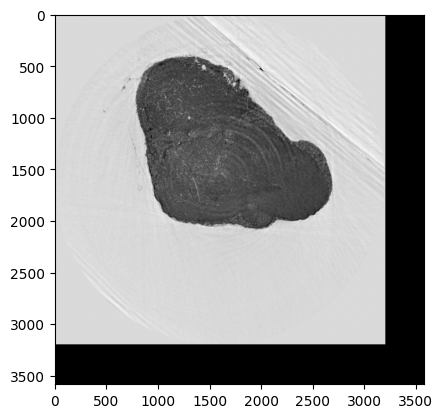

In [32]:
slice = dataset[2700, :, :]

plt.imshow(slice, cmap='gray')

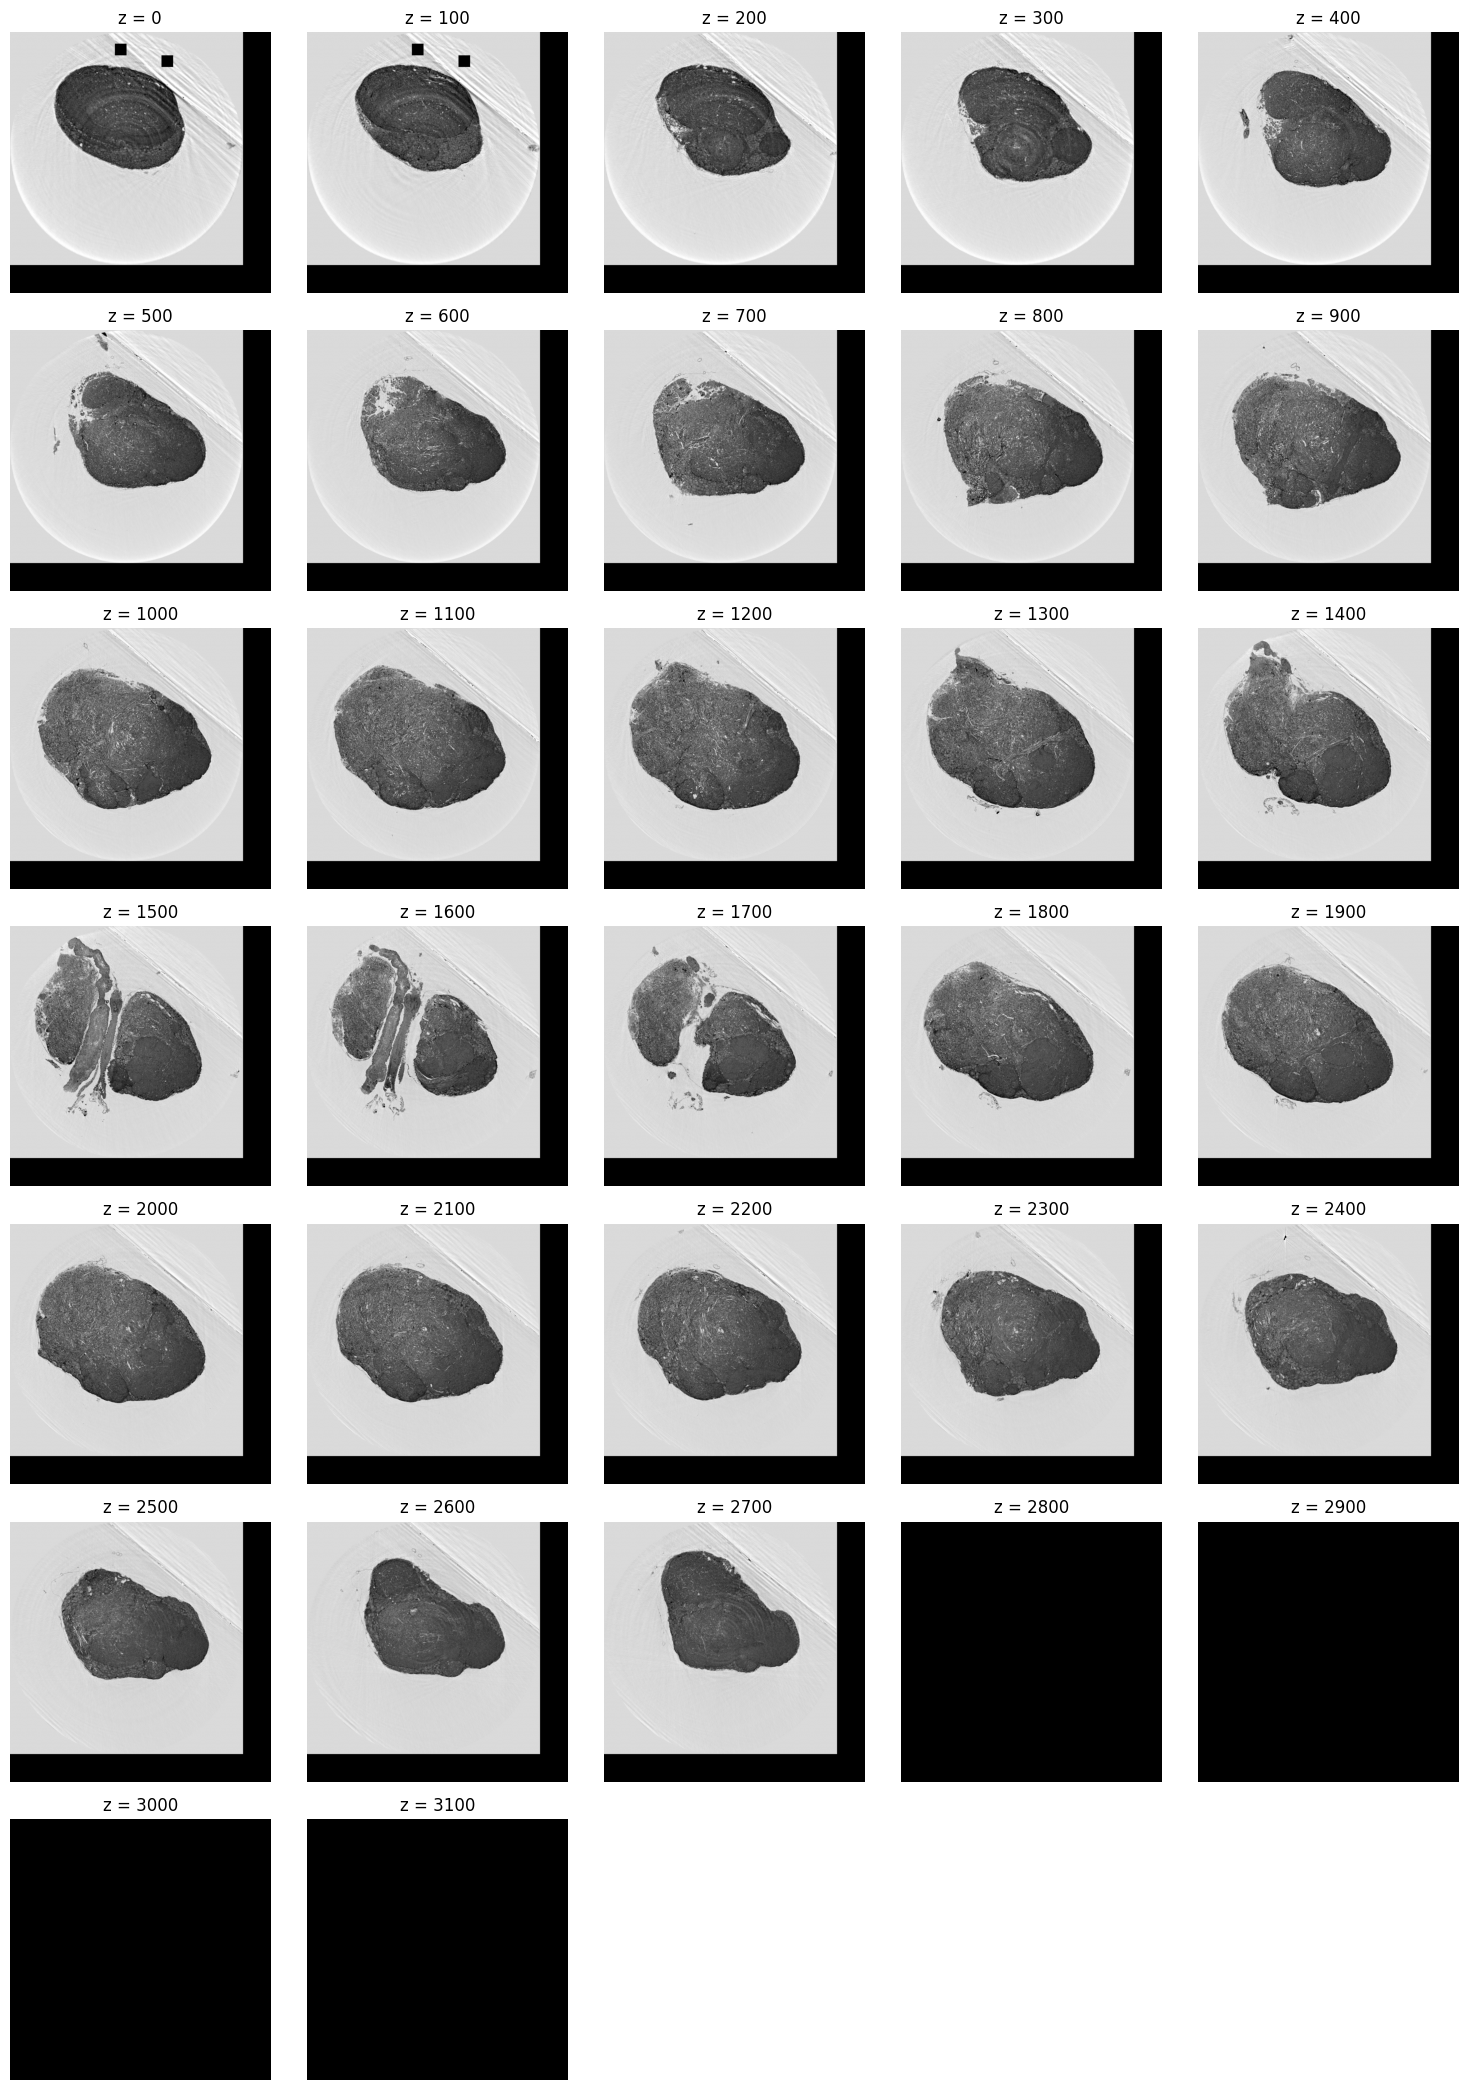

In [17]:
z_slices = range(0, 3200, 100)

# Determine the number of rows and columns for the subplot grid
n_cols = 5
n_rows = (len(z_slices) + n_cols - 1) // n_cols  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))

for i, z in enumerate(z_slices):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    slice = dataset[z, :, :]
    ax.imshow(slice, cmap='gray')
    ax.set_title(f'z = {z}')
    ax.axis('off')

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [1]:
# The above is likely an issue between tensorstore writing in XYZ while bossdb is in ZYX.